<div style="font: 24px Menlo; padding: 6px; color: #0000e0"><b>Introduction to SiLK Analysis</b></div>

# Notebook Objective

At the end of this module, you will have an understanding of:
- displaying SiLK records in text format
- filtering for records of interest
- counting based on fields of interest
- creating and working with IP sets

## Legal

Copyright 2017 Carnegie Mellon University. All Rights Reserved.

This material is based upon work funded and supported by the Department of Defense under Contract No. FA8702-15-D-0002 with Carnegie Mellon University for the operation of the Software Engineering Institute, a federally funded research and development center.

The view, opinions, and/or findings contained in this material are those of the author(s) and should not be construed as an official Government position, policy, or decision, unless designated by other documentation.
References herein to any specific commercial product, process, or service by trade name, trade mark, manufacturer, or otherwise, does not necessarily constitute or imply its endorsement, recommendation, or favoring by Carnegie Mellon University or its Software Engineering Institute.

NO WARRANTY. THIS CARNEGIE MELLON UNIVERSITY AND SOFTWARE ENGINEERING INSTITUTE MATERIAL IS FURNISHED ON AN "AS-IS" BASIS. CARNEGIE MELLON UNIVERSITY MAKES NO WARRANTIES OF ANY KIND, EITHER EXPRESSED OR IMPLIED, AS TO ANY MATTER INCLUDING, BUT NOT LIMITED TO, WARRANTY OF FITNESS FOR PURPOSE OR MERCHANTABILITY, EXCLUSIVITY, OR RESULTS OBTAINED FROM USE OF THE MATERIAL. CARNEGIE MELLON UNIVERSITY DOES NOT MAKE ANY WARRANTY OF ANY KIND WITH RESPECT TO FREEDOM FROM PATENT, TRADEMARK, OR COPYRIGHT INFRINGEMENT.

[DISTRIBUTION STATEMENT A] This material has been approved for public release and unlimited distribution.  Please see Copyright notice for non-US Government use and distribution.

Internal use:\* Permission to reproduce this material and to prepare derivative works from this material for internal use is granted, provided the copyright and “No Warranty” statements are included with all reproductions and derivative works.

External use:\* This material may be reproduced in its entirety, without modification, and freely distributed in written or electronic form without requesting formal permission. Permission is required for any other external and/or commercial use. Requests for permission should be directed to the Software Engineering Institute at permission@sei.cmu.edu.

\* These restrictions do not apply to U.S. government entities.
Carnegie Mellon® is registered in the U.S. Patent and Trademark Office by Carnegie Mellon University.

DM17-0973


## Some Basics
You can navigate through this training using the arrow keys, or by scrolling your browser.  Input cells (prefixed with `In []:` can be executed using any of the following mechanisms:

* Using the ⌃↩ (Control-Enter) hotkey
* Clicking on the ▶︎❘ icon in the toolbar above
* Selecting `Run cells` from the `Cell` menu in the menu bar at the top of this page

The cells in this notebook have been locked. Typically, you can make changes to notebooks by selecting any input cell and clicking Enter to switch to edit mode.  Escape exits back to command mode.  A list of other hotkeys can be accessed by typing `H` from command mode.

<div class="girk" style="font: 18px Times">
**Exercise** Run the command in the cell below by clicking on the cell and hitting ⌃↩ (Control-Enter).</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
rwsiteinfo --fields=sensor,describe-sensor,repo-start-date,repo-end-date

# Basic SiLK Tools

By the end of this section:
- The learner will be able to display selected fields from a sequence of flow records.
- The learner will be able to determine which flow-record fields will be useful for a given analysis.
- The learner will be able to identify which rwfilter keywords are selection options.
- The learner will be able to pull flow records from a SiLK repository.

## Basic SiLK Tools: rwcut

The SiLK tool `rwcut` provides an analyst with a way to display binary records in human-readable ASCII.  This is useful for printing flows to the screen, or for providing input to text-processing tools.  At a basic level, you'll only need to make use of the ``--fields`` option.  The following table contains the list of fields in a SiLK record:

| Field Number | Field Name | Description |
|:------------: |:----------- | :----------- |
| 1 | sIP | Source IP address for flow |
| 2 | dIP | Destination IP address for flow |
| 3 | sPort | Source port for flow (or 0) |
| 4 | dPort | Destination port for flow (or 0) |
| 5 | protocol | Transport-layer protocol number for flow |
| 6 | packets, pkts | Number of packets in flow |
| 7 | bytes | Number of bytes in flow (starting with IP header) |
| 8 | flags | Cumulative TCP flag fields of flow (or blank) |
| 9 | sTime | Start date and time of flow |
| 10 | duration | Duration of flow |
| 11 | eTime | End date and time of flow |
| 12 | sensor | Sensor that collected the flow |
| 13 | in | Ingress interface or VLAN on sensor (usually zero) |
| 14 | out | Egress interface or VLAN on sensor (usually zero) |
| 15 | nhIP | Next-hop IP address (usually zero) |
| 16 | sType | Type of source IP address (pmap required) |
| 17 | dType | Type of destination IP address (pmap required) |
| 18 | scc | Source country code (pmap required) |
| 19 | dcc | Destination country code (pmap required) |
| 20 | class | Class of sensor that collected flow |
| 21 | type | Type of flow for this sensor class |
| -- | iType | ICMP type for ICMP and ICMPv6 flows (SiLK V3.8.1+) |
| -- | iCode | ICMP code for ICMP and ICMPv6 flows (SiLK V3.8.1+) |
| 25 | icmpTypeCode | Both ICMP type and code values (before SiLK V3.8.1) |
| 26 | initialFlags | TCP flags in initial packet |
| 27 | sessionFlags | TCP flags in remaining packets |
| 28 | attributes | Termination conditions |
| 29 | application | Standard port for application that produced the flow |


By default `rwcut` displays:
- sIP (1), sPort (3)
- dIP (2), dPort (4)
- Protocol (5)
- packets, bytes
- flags
- sTime, eTime, duration
- sensor

When passing fields to the `--fields` option, you can pass them either by field number (and therefore a range), or by a comma separated list of field names, or a mix of both.


<div class="girk" style="font: 18px Times">
**Exercise** Run the command to create the ex3records.rw file</div><i class="fa fa-lightbulb-o "></i>



In [14]:
# rwfilter will not overwrite a file
rm -f ex3records.rw

rwfilter --type=all             \
        --sensor=S0             \
        --start=2009/04/20T11   \
        --proto=0-              \
        --pass=stdout           \
| rwsort --fields=stime         \
| rwfilter --input-pipe=stdin   \
        --max-pass=30           \
        --proto=0-              \
        --pass=ex3records.rw

<div class="girk" style="font: 18px Times">
**Exercise** What do the data look like?</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
rwcut ex3records.rw --fields=1-5,application

<div class="girk" style="font: 18px Times">
**Exercise** Edit the previous command and try other values for the --fields option or try omitting the --fields options.</div><i class="fa fa-lightbulb-o "></i>

### What does a raw file look like?

As mentioned, rwcut is needed to display a binary SiLK file as human readable ASCII.  However, not everything stored in a binary SiLK file in unreadable to humans.

<div class="girk" style="font: 18px Times">
**Exercise** Run the following commmand to generate a raw file and attempt to view it</div><i class="fa fa-lightbulb-o "></i>


In [ ]:
cd  # make home directory the working directory
rm -f t1.rw  # remove file; ok if no such file
rwfilter --type=in \
  --start-date=2009/04/20T12 --protocol=0- \
  --compress=none  \
  --max-pass=1     \
  --pass=t1.rw
echo -e "\n----Show file exists----\n"
ls -l t1.rw
echo -e "\n----Show advanced file stats----\n"
rwfileinfo t1.rw
echo -e "\n----Hexdump output----\n"
hexdump -C t1.rw  # any readable text?
echo -e "\n----rwcut output----\n"
rwcut --fields=1-5,packets t1.rw

Taking a look at the `rwfileinfo` command output, we can see that a field called `command-lines` contains the command that we used to create the `t1.rw` file.  The `hexdump` command output highlights that the `command-lines` field is stored in the file header and is human readable.

## Basic Silk Tools: rwfilter

rwfilter is the Swiss Army Knife of the SiLK toolset.  It’s always the starting point for your analyses:
- rwfilter pulls data from the repository.  Specific switches locate the data within the repository
- rwfilter has advanced filtering criteria to evaluate each flow as it’s pulled from the repository
- rwfilter allows you to direct matching, non-matching or all flows through standard unix pipes
- rwfilter provides some basic statistics and counting to let you know what was pulled from the repository
- rwfilter has built-in compression, specified when the tool is installed on your site
- rwfilter (along with other SiLK tools) contains hooks to plug in additional filtering capabilities to suit your needs
There’s a lot of complexity in the parameters to rwfilter, but a lot of expressive power to rapidly retrieve the flows for your analyses.

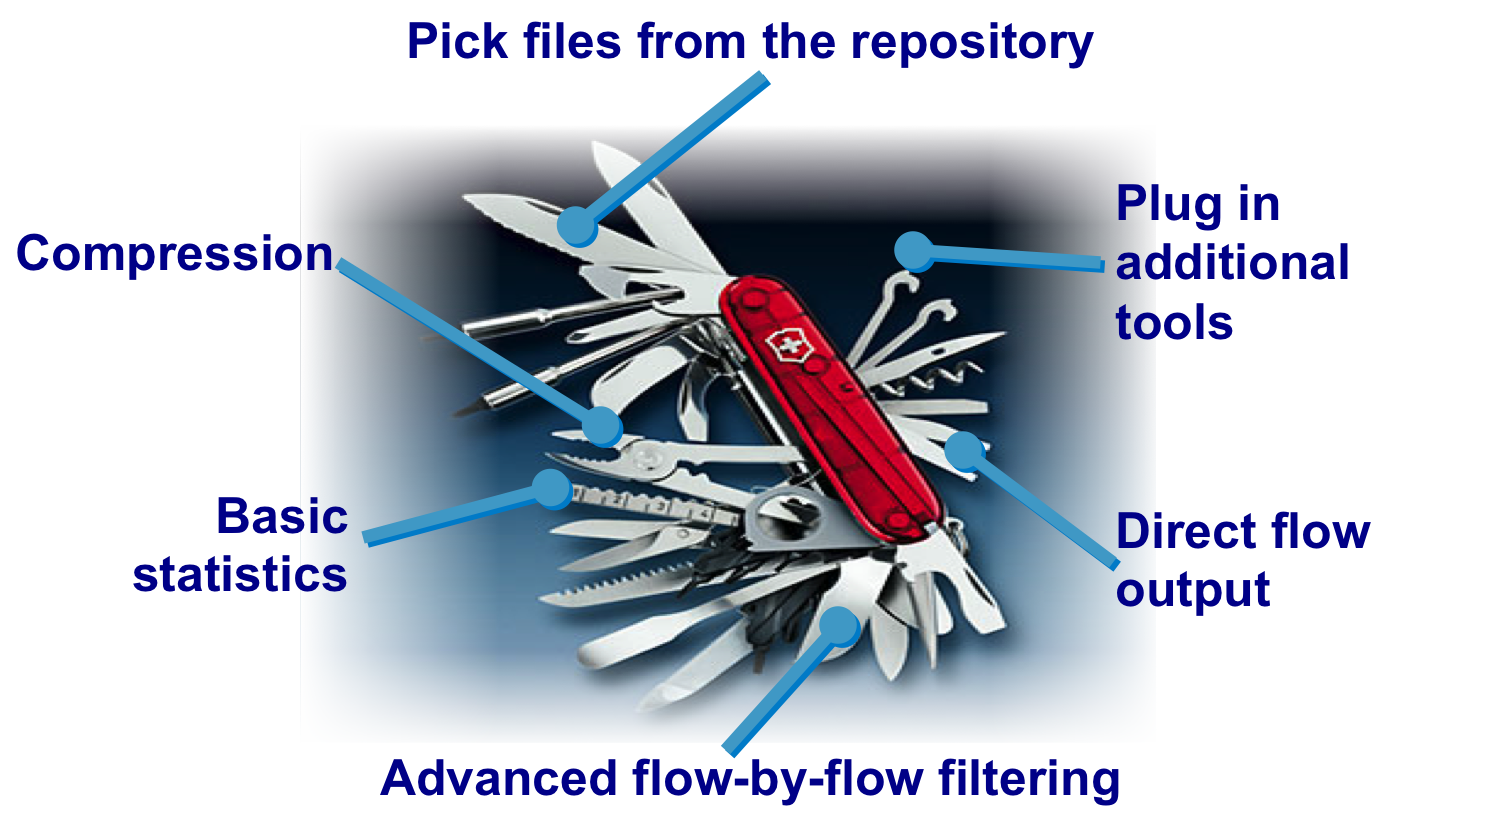

### rwfilter Syntax

The general form of an rwfilter call is:
`rwfilter {INPUT | SELECTION}  PARTITION OUTPUT [OTHER]`

An example rwfilter call is:
```
rwfilter --sensor=S0              \
         --type=in                \        
         --start-date=2015/8/5T13 \        
         --end-date=2015/8/5T20   \      
         --protocol=0-            \
         --pass=workday-5.rw
```

Parameters to rwfilter can occur in any order, and can be abbreviated to any unique prefix (e.g., ‘--start-date’ can be ‘--start’).  The grouping of parameters that we use in this notebook is mainly for explanation.  Notice that the date is separated from the hour by a “T” instead of a colon; this helps to avoid confusion.

**Input** parameters are used to specify an input source other than the repository.

**Selection** parameters specify the criteria used to “Select” files from the repository.

**Partitioning** parameters specify the criteria used to divide data between PASS and FAIL streams.

**Output** parameters direct where to send records that match and/or fail to match the partitioning criteria.

**Other** parameters are used for special purposes, such as syntax checking, dealing with IPv6 data, etc.

Any given parameter may be used only once in a call to rwfilter, except --pass, --fail, --all, and input filenames.
You must choose one category of data ingest: selection parameters, input filenames, or one --xargs.

In general, rwfilter requires: 
- an input source (the repository, a file or a pipe), 
- at least one partitioning parameter (--protocol=0-255 is a vacuous parameter), 
- an output destination (a pipe, a file, or a statistics specification.)

If you miss a required parameter, rwfilter will produce an error message rather than try to guess what you want or go with some hidden default.

### Selection and Input Criteria

Selection options control access to repository files:
- `--start-date=2009/4/21`
- `--end-date=2009/4/21T03`
- `--sensor=S0`
- `--type=in,inweb`
In `--start-date` and `--end-date`, the hour isn’t an instant in time; it’s a whole hour. For example `--start-date=2009/4/21T00 --end-date=2009/4/21T01` represents a two-hour period.

Alternatively, we use input criteria for a pipe or a file:
- `myfile.rw`
- `stdin`
This feature is useful for chaining filters through a pipe with stdin/stdout.

### Basic Partitioning Options

Partitioning offers us the ability to filter flow records into PASS or FAIL buckets by examining things like:
- Simple numeric fields: ports, protocol, ICMP Type
- Specified IP addresses, CIDR blocks
- Sets of IP addresses
- Combinations of key fields – Tuple files

There are a number of places where partitioning criteria can come from:
- Hosts or subnets that you specifically need to monitor
- Firewall rule-sets, if you want to check if network flows are somehow evading your firewalls
- IDS rules, to look for network traffic that may have triggered an alert
- Network protocol information, to pull out traffic related to some specific protocol

#### Simple Numeric Key Fields
These options accept a simple list of integers and integer ranges, and most of them are named the same as the fields that they test: protocol, sport, and dport.  Options include:
```
--protocol=
--sport= --dport= --aport=		# source, dest, any
```
Some examples are:
```
--protocol=6,17			    # TCP or UDP
--protocol=0-5,7-16,18-		# not TCP or UDP
--protocol=0-				# all protocols
--dport=80,443			    # HTTP or HTTPS
--sport=6000-6063,9100-9107	# X11 or JetDirect
--aport=20,21				# FTP
--sport=0-1023			    # Well-Known Ports
```

You should only test the port fields (sport and dport) when protocol is restricted to protocols that use ports, such as TCP and UDP. The port fields should not be tested when ICMP flows might be examined, because under the hood, icmp-type and icmp-code are usually stored in the dport field.

#### Specified IP address or CIDR block

SiLK has numerous ways to examine IP addresses, so the partitioning options for addresses are NOT the same as the field names.  Options include:
```
--saddress=       --daddress=       --any-address=
--not-saddress=   --not-daddress=   --not-any-address=
```
These options allow you to specify a **single**:
```
	IP address			192.0.2.1
	CIDR block			192.0.2.0/24
```

As you can see the `--saddress` option is not the same as the field name sIP.  In addition to addresses and CIDR blocks, these options also allow you to specify wildcards, a syntax that is unique to SiLK.

#### Specified IP addresses or CIDR blocks

These options permit multiple addresses and CIDR block specifications.  Wildcards are not permitted since it would be ambiguous whether the commas separated specifications, or were part of a wildcard.  Options include:
```
--scidr=		--dcidr=	    --any-cidr=
--not-scidr=	--not-dcidr=    --not-any-cidr=
```
You may specify multiple:
```
    IP addresses	192.0.2.1,198.51.100.3
	CIDR blocks		192.0.2.0/24,198.51.100.0/24
    mixture		    192.0.2.1,192.0.2.8/29
```

#### Sets of arbitrary addresses

SiLK tools exist that allow you to create arbitrary sets of IP addresses to be used in filtering.  These tools are described later.  Options to filter by arbitrary addresses are:
```
--sipset=	    --dipset=	    --anyset=
--not-sipset=	--not-dipset=	--not-anyset=
```
Specifies the name of a file storing the IP set:
```
    --sipset=internalservers.set
	--dipset=RussianBizNtwk.set
	--anyset=TorNodes.set
	--not-dipset=whitelist.set
```

### rwfilter output options

rwfilter leaves the flows in binary (compact) form. Output options control where records that pass or fail partitioning criteria go.  They can also provide some summary statistics.  Options include:
```
--pass-destination=		# file to get records that pass
--fail-destination=		# file to get records that fail
--all-destination=		# file to get all records

--print-statistics		    # report recs read/pass/fail
--print-volume-statistics	# report how many
                            # recs/pkts/bytes pass/fail
```
A single rwfilter command can provide multiple outputs. You can specify that pass records go to one file or pipe, fail records go to a second file or pipe, and volume statistics go to a third file, all on a single command (although it’s pretty rare to get this complex).

<div class="mark">**Question** What is going on in the rwfilter call below?</div>

In [9]:
rwfilter --sensor=S0             \
         --type=in               \
         --start=2009/4/21T00    \
         --end=2009/4/21T07      \
         --daddress=10.1.0.0/16  \
         --print-volume-stat

     |              Recs|           Packets|               Bytes|     Files|
Total|              1436|              2615|              158084|         8|
 Pass|              1436|              2615|              158084|          |
 Fail|                 0|                 0|                   0|          |


> <div class="girk" style="font: 18px Times">This queries the repository for an 8-hour period on April 21, 2009, pulling all non-web, incoming flows, and reporting volume statistics on how many went to address block 10.1.0.0/16 (pass) or not (fail).  The total line of the output is all non-web, incoming records during that period.  The pass line in the output is the traffic volume going to that network. The fail line of the output is the volume of all the other non-web traffic coming in.</div>

<div class="girk" style="font: 18px Times">
**Exercise** Find all traffic going outbound to external HTTPS servers on April 20, 2009.  Save these flows in file https0420.rw.  Only pull records captured by sensor S0. </div><i class="fa fa-lightbulb-o "></i>

<div class="mark">**Question** How many flow records matched the criteria?</div>




Run the command below for the solution:

In [ ]:
cat exercises/exercise1

# Basic SiLK Counting Tools

By the end of this section:
- The learner will be able to create a time series of given flow records.
- The learner will be able to determine all the different values of a given field for given flow records and determine the traffic volumes for those field values.
- The learner will be able to display the top/bottom n values of a given field as measured by some measure of volume.

Many analysis tasks require us to group records together by a key field or fields, calculate a volume for each group, and report or summarize the results. The general request is “Count [volume] by [key field] and print [summary]”.

Here are some examples:

Suppose we have a day’s worth of all outgoing traffic records from our network, and we want to perform a basic bandwidth study. This can translate to, “Count bytes by hour and print the results.” Suppose further that one hour shows a large spike in traffic, and we want to know which internal IP addresses are associated with the spike by listing the “top 10 talkers” for that hour. This translates to, “Count bytes by source IP and print the 10 highest volume IPs.” 

In another example, an internal IP is reported to be “behaving strangely”, and we want to summarize all of its activity in a given hour. To do this, we might start with a list of who it contacted, and what kind of interactions it made. This can translate to “Count records by destination IP and destination port pair, and print out all of the results”

A final example, in one hour’s worth of traffic, a virus-infected host was seen scanning over 100 different destination IP addresses. Were any other machines on our network behaving similarly? This can translate to, “Count unique destination IPs by source IP, and print the sources that contacted 100 or more destinations.” 

While these analyses seem complicated at first glance, they are easy to implement with counting tools.

## Categorization—Bins

In order to perform counting tasks, we need to group flow records together by a key field or fields. This is also known as binning.  How we bin records together depends on what we are interested in measuring.  For example, for motor vehicle trips we could bin trip records by:
- vehicle style – sedan, coupe, SUV, pickup, van
- highway or city trip
- personal or business trip

And we could measure the trips and aggregate in the bins different measurements:
- total miles
- fuel consumption
- oil consumption
- pollutant emission

So if we are interested in measuring the total trip miles by vehicle style, we would bin our records by vehicle style and calculate a volume of trip miles per vehicle group.

Similarly, for flows we could bin by:
- address or address block
- port
- protocol
- time period

We could measure the flows and aggregate in the bins:
- count of flow records, packets, bytes
- count of distinct values of other fields, e.g., addr
- earliest sTime, latest eTime

So each bin aggregates measures (records, packets, bytes, etc.) for a different address, or a different address block, or a different port, or a different protocol, or a different time period.

In the following example, a single field (protocol) is used as the bin key. The aggregate value field is the packet count.

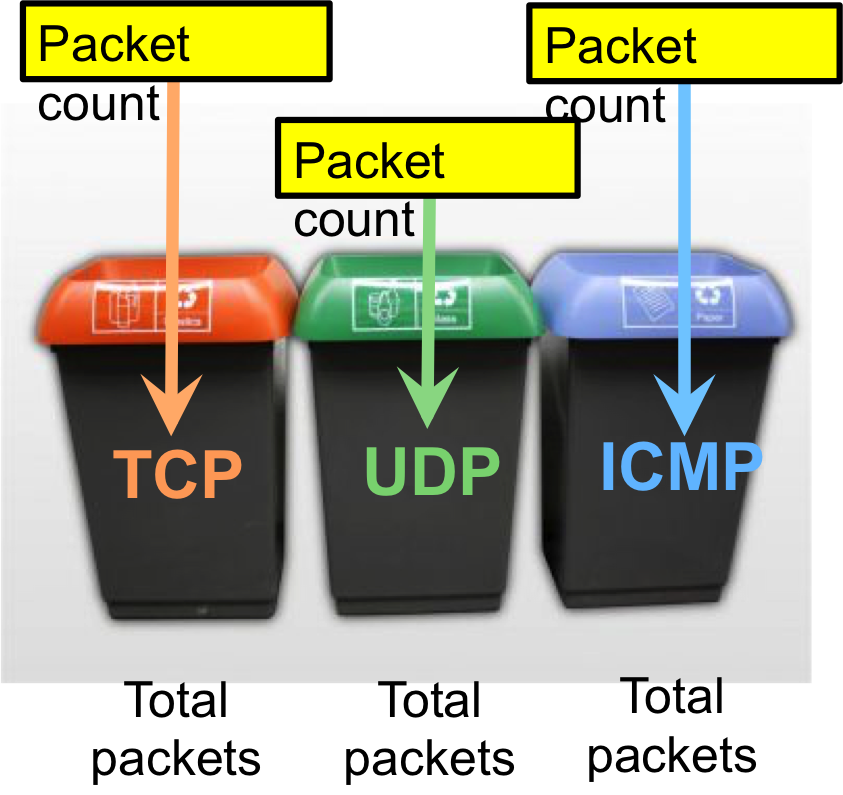

- If the flow record under examination is a TCP flow (protocol 6), then the packet count in that record is added to the TCP bin.
- If the flow record under examination is a UDP flow (protocol 17), then the packet count in that record is added to the UDP bin.
- If the flow record under examination is a ICMP flow (protocol 1), then the packet count in that record is added to the ICMP bin.

When binning by time, you must specify the period of time for each bin. This is called the bin-size. It’s the size of the bin’s opening, not the volume of the container.

## Basic SiLK Counting Tools: rwcount, rwstats, rwuniq

There are several basic SiLK counting tools. Each one is suited for different combinations of key fields, volumes or summaries.
- `rwcount` is used to count volume across time
- `rwstats` is used for counting and summarizing volume across IP, port or protocol
- `rwuniq` is the most general of the counting tools, and can be used to count volumes across any combination of key fields

Key fields are all types of SiLK fields, such as port, protocol, time, or IP address.  

For flow records, volume is usually the number of records, the number of bytes, or the number of packets. `rwuniq` also supports some other volumes we will discuss later.

Each tool takes raw binary flow as input, specified as a file name, or piped in from the output of a previous command such as rwfilter.

### rwcount

`rwcount` is used to produce a count of records, bytes and packets over time. It provides a fast, easy way of summarizing volumes as a time series, and it is great for simple bandwidth studies.

With `rwcount`, the bin key is always time. You choose the period. The aggregate measures are chosen for you. They are flows (records), bytes, packets.  For example:

In [2]:
rwfilter --sensor=S0 --start=2009/4/21 \
         --type=in --proto=1 \
         --pass=stdout       \
 | rwcount --bin-size=3600

               Date|        Records|               Bytes|          Packets|
2009/04/21T06:00:00|           1.00|              252.00|             3.00|
2009/04/21T07:00:00|           0.00|                0.00|             0.00|
2009/04/21T08:00:00|           0.00|                0.00|             0.00|
2009/04/21T09:00:00|           0.00|                0.00|             0.00|
2009/04/21T10:00:00|           0.00|                0.00|             0.00|
2009/04/21T11:00:00|           0.00|                0.00|             0.00|
2009/04/21T12:00:00|           0.00|                0.00|             0.00|
2009/04/21T13:00:00|          10.00|             2460.00|            41.00|
2009/04/21T14:00:00|          29.00|             8036.00|           107.00|
2009/04/21T15:00:00|          22.00|             2214.00|            47.00|
2009/04/21T16:00:00|          10.00|             1586.00|            23.00|
2009/04/21T17:00:00|           2.00|              524.00|             4.00|
2009/04/21T1

<div class="girk" style="font: 18px Times">
**Exercise** Produce a time-series with 30-minute intervals, analyzing incoming ICMP traffic collected at sensor S0 on April 20, 2009.</div><i class="fa fa-lightbulb-o "></i>

Run the command below for the solution:

In [ ]:
cat exercises/exercise2

### rwuniq

rwuniq will display all bins for a particular field or fields. Output is normally unsorted. `--sort-output` causes sorting by the key (bin).

`rwuniq --fields=KEY --value=VOLUME`
- Choose one or several key fields. 
- Aggregate volume count: records, bytes, or packets.
- standard output formatting options (see “man rwuniq”)

Apply thresholds to bins before outputting:
- `--bytes, --packets, --flows, --sip-distinct,--dip-distinct`
- Specify minimum aggregate value or a range

`--sort-output` by key (`rwstats` sorts by value)

The fields option takes a list of one or more keys.  The keys can be any valid specification of SiLK fields. For example a list of names like sIP, sPort and sTime. `rwuniq` and `rwstats` also support a `--bin-time` option, in seconds, when one or more key fields is a time field. Another option is to specify fields numerically, for example `--fields=1-5` for source address, destination address, source port, destination port and protocol.

`rwuniq` counts the usual volumes of flows, bytes and packets, but it also has a few added options. Use the `sip-distinct` or `dip-distinct` flags to count unique source addresses or unique destination addresses by key field combination. Use the `stime` or `etime` fields to include a minimum start time, or maximum end time, respectively, for each key field combination. `rwuniq` also allows you to choose any combination of these volumes for printing. Use the `--all-counts` option to print everything.

If input is not pre-sorted, there is no guarantee that the default behavior of `rwuniq` will print key fields in sort order. Use the `sort-output` flag to ensure this is the case. Note that `sort-output` sorts by key field combination, not volume, so this is NOT an option to obtain top-N lists.  `rwuniq` does not support printing top or bottom N lists. However, any volume can be restricted to print only key combinations whose counts meet a minimum threshold, or occur within a range.

An example rwuniq call is:

```
rwfilter outtraffic.rw       \      
      --stime=2010/12/08:18:00:00-2010/12/08:18:59:59.999 \     
      --saddress=71.55.40.62 \
      --pass=stdout          \
| rwuniq --fields=dip,sport  \
         --all-counts       \
         --sort-output

           dIP|sPort |     Bytes|Packets| Records|     sTime-Earliest|       eTime-Latest|
 12.113.41.190|   80 |     12782|     20|       4|2010/12/08T18:42:51|2010/12/08T18:58:49|
30.182.228.143|   80 | 203907933| 143611|       2|2010/12/08T18:53:59|2010/12/08T19:01:47|
 37.153.24.229|   80 | 205628625| 144829|       2|2010/12/08T18:29:11|2010/12/08T18:42:51|
 82.180.203.87|   80 | 213013145| 150896|      92|2010/12/08T18:06:36|2010/12/08T18:32:33|
82.180.203.197|   80 |       800|      8|       2|2010/12/08T18:43:30|2010/12/08T18:43:30|
88.124.166.233|   80 | 223930369| 158276|      97|2010/12/08T18:08:55|2010/12/08T18:32:25|
88.124.166.233|  443 |    509285|    732|      43|2010/12/08T18:06:57|2010/12/08T18:51:11|
94.239.226.247|   80 | 124833037|  96047|       3|2010/12/08T18:25:22|2010/12/08T19:21:34|
  109.95.61.80|   80 |   8467397|   6325|      90|2010/12/08T18:08:59|2010/12/08T18:10:09|
  139.65.186.4|   80 | 204123360| 143794|       3|2010/12/08T18:19:48|2010/12/08T18:26:36|
139.177.10.136|   80 | 407978375| 287354|       6|2010/12/08T18:20:03|2010/12/08T19:01:30|
198.237.16.172|   80 | 159066748| 112025|       1|2010/12/08T18:18:43|2010/12/08T18:46:55|
219.149.72.154| 1024 |        44|      1|       1|2010/12/08T18:50:40|2010/12/08T18:50:40|
249.216.88.172|   80 |        88|      2|       2|2010/12/08T18:44:42|2010/12/08T18:44:47|
250.211.100.88|   80 |   3295160|   2492|      42|2010/12/08T18:47:50|2010/12/08T18:58:53|
```

Here is an example of a user profile for the largest offender in a bandwidth study. We use rwuniq with the key fields of destination IP and source port, print all counts for each dIP-sPort pair, and sort the output by key.

Sorting the output by the key (bin) made it obvious that the same IP address (88.124.166.233) appears twice with two different ports.

In the follwoing example, we are looking for potential scanners in one hour’s worth of anomalous traffic. We run `rwuniq` using destination IP as a key field, and specifying the `sip-distinct` flag with a threshold of 400 or more unique addresses. We also set the records and bytes values.

```
rwuniq outtraffic.rw       \
       --fields=dip        \
       --values=sip-distinct,records,bytes  \ 
       --sip-distinct=400- \
       --sort-output

             dIP|sIP-Distin|     Bytes| Records|
   13.220.28.183|       512|     20480|     512|
    171.128.2.27|       448|  19069280|  476732|
   171.128.2.179|       448| 139501200| 3487530|
  171.128.212.14|       448| 139467440| 3486686|
 171.128.212.124|       448| 127664480| 3191612|
 171.128.212.127|       448|  66611560| 1665289|
 171.128.212.188|       448| 139467680| 3486692|
 171.128.212.228|       448| 139393160| 3484829|
 245.225.153.120|       763|     30520|     763|
 245.238.193.102|      1339|    179480|    4487|
```

Each of these addresses has contacted over 400 destinations.  But the last two addresses have record and byte counts that are relatively small compared to the number of addresses contacted – a stronger indication that they might be scanning.



<div class="girk" style="font: 18px Times">
**Exercise** For outgoing flows from S0 on 2009/04/20, write and execute the rwfilter piped to rwuniq commands to list how many TCP flows (records) there were with each different number of packets.  Display sorted by the number of packets.</div><i class="fa fa-lightbulb-o "></i>
<div class="mark">**Question** Are there any odd results you can explain?</div>

Run the command below for the solution:

In [ ]:
cat exercises/exercise3

### rwstats

Like `rwuniq`, `rwstats` displays bins for a field or fields, but only displays the top N or bottom N bins. The top/bottom N is determined by some traffic volume measurement, such as flows, packets, or bytes. The bins are displayed sorted by the measurement. `rwstats` also provides percentages.

`rwstats --overall-stats`
- Descriptive statistics on byte and packet counts by record
- See “man rwstats” for details.

```
rwstats	 --fields=KEY --value=VOLUME
            --count=N or --threshold=N or
            --percentage=N
            [--top or --bottom]
```

- Choose one or two key fields. 
- Count one of records, bytes, or packets.
- Great for Top-N lists and count thresholds
- standard output formatting options (see “man rwstats”)

There are two different ways to call `rwstats`. Use the `--overall-stats` option to print descriptive statistics on byte and packet counts by record. This option is useful as a general summary of record volumes, and can help in determining which volumes are unusually small or large. We aren’t going to go into detail for this option;  See “man rwstats” for specifics.

`rwstats` also can be called with key and volume options. We can choose one, or in a few cases, two key fields. We also choose one of records, bytes or packets to count, and choose the type of summary to print to the screen. `rwstats` is great for producing Top-N lists and for thresholding based on counts. 

`rwstats` has three summary options.  
- Use the count flag to specify a list of the top or bottom N keys by volume.  
- Use the threshold flag to print all keys whose counts are either greater or less than a threshold (for example, “all destination ports with more than 24000 bytes of traffic”).  
- Finally, use the percentage flag to print all keys whose counts make up at least or at most N percent of all traffic.  (For example “all source IP addresses that account for at least 5% of all records”)    

Finally, use the `--top or --bottom` flags to indicate the direction of the count or threshold:  top-N or bottom-N for counts, or volume greater or less than N for thresholds and percentages.

The following is an example top 10 list of Source IPs for the anomalous hour we found in a bandwidth study.


```
rwfilter outtraffic.rw \
         --stime=2010/12/08T18:00:00-2010/12/08T18:59:59 \
         --pass=stdout \
 | rwstats --fields=sip \
           --values=bytes  \
           --count=10

INPUT: 1085277 Records for 1104 Bins and 4224086177 Total Bytes
OUTPUT: Top 10 Bins by Bytes
                 sIP|      Bytes|    %Bytes|   cumul_%|
         71.55.40.62| 1754767148| 41.541935| 41.541935|
        71.55.40.169| 1192063164| 28.220617| 69.762552|
        71.55.40.179|  331310772|  7.843372| 77.605923|
        71.55.40.204|  170966278|  4.047415| 81.653338|
      177.249.19.217|  122975880|  2.911301| 84.564639|
         71.55.40.72|  110726717|  2.621318| 87.185957|
        71.55.40.200|  101593627|  2.405103| 89.591060|
      177.71.129.255|   40166574|  0.950894| 90.541954|
         71.55.40.91|   35316554|  0.836076| 91.378030|
     149.249.114.204|   26634602|  0.630541| 92.008571|
```

We pull out the hour in question and call rwstats using source IP, bytes, and count equal to 10. Since rwstats reports both a count and a cumulative percentage, we can see easily that the top ten addresses account for 92.0 percent of the traffic for that hour, with 41.5 percent attributed to the top address alone.

This address definitely looks like to be an issue. We can now use rwuniq to get a user profile.

<div class="girk" style="font: 18px Times">
**Exercise** What are the top 10 incoming protocols on April 20, 2009, collected on sensor S0?</div><i class="fa fa-lightbulb-o "></i>

Run the command below for the solution:

In [ ]:
cat exercises/exercise4

<div class="girk" style="font: 18px Times">
**Exercise** Top 9 inside hosts according to how many outside hosts they communicate with on April 20, 2009, collected on sensor S0?</div><i class="fa fa-lightbulb-o "></i>

Run the command below for the solution:

In [ ]:
cat exercises/exercise5

### rwuniq vs. rwstats 

The following table compares some features of rwuniq and rwstats and the features shared by both.

| rwuniq | both | rwstats in top/bottom mode|
|:------------ |:----------- | :----------- |
| all bins except per thresholds | Bin by key | --top or --bottom bins |
| | Default aggregate value is flows (records).| |
| --sort-output by key otherwise unsorted | | Sorted by primary aggregate value |
| Thresholds or ranges: --bytes, --packets, --flows, --sip-distinct, --dip-distinct | Choose which bins have aggregate values significant enough to output. | ‑‑count, ‑‑threshold, ‑‑percentage |
| --all-counts (bytes, pkts, flows, earliest sTime, and latest eTime) | Show volume aggregate value[s]. | --no-percents (good when primary aggregate isn’t Bytes, Packets, or Records) |
| | --bin-time to adjust sTime and eTime | |
| | --presorted-input (omit when value includes Distinct fields, even if input is sorted) | |
| --values=sTime‑Earliest, eTime‑Latest| ‑‑values=Records, Packets, Bytes, sIP-Distinct, dIP-Distinct, Distinct:KEY‑FIELD (KEY-FIELD can’t also be key field in ‑‑fields) | |

# IP Sets

By the end of this section:
- Given a collection of IP addresses and CIDR blocks, the learner will be able to create an IP Set SiLK-file.
- Given an IP Set, the learner will be able to display the contents and characteristics of the set.
- Given an IP Set, the learner will be able to partition flow records based on the presence/absence of IP addresses in the set.
- Given a sequence of flow records, the learner will be able to extract IP addresses from the records and create an IP Set.

A set is a well-defined collection of distinct objects. The objects that make up a set (also known as the set's elements or members) can be anything: numbers, people, letters of the alphabet, other sets, and so on.  For example:

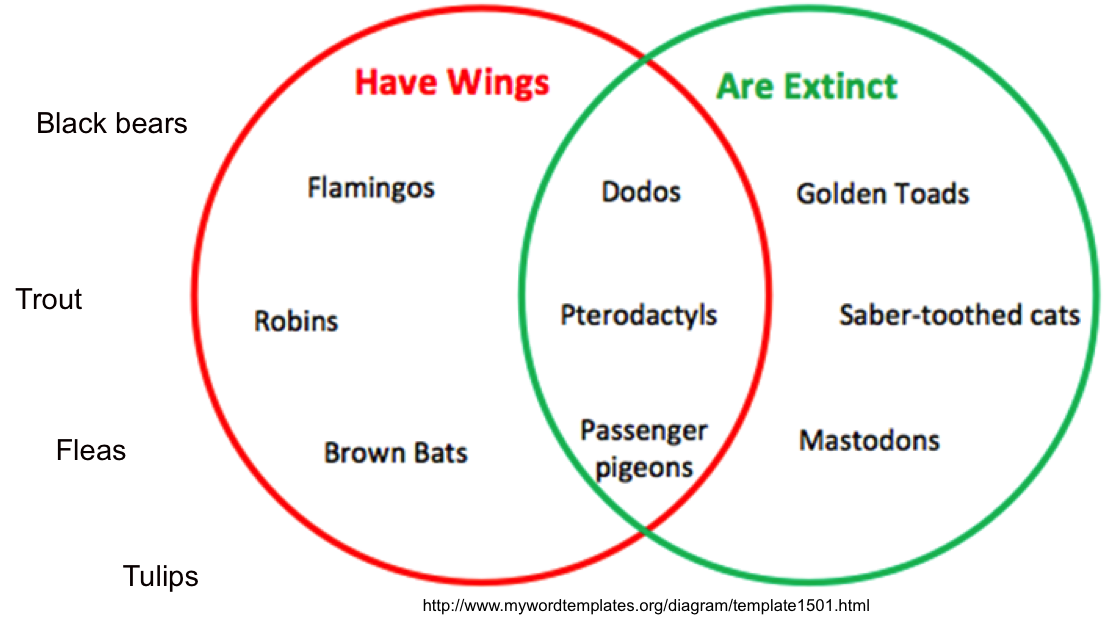

There are six species in the red circle (species with wings), six species in the green circle (species that are extinct), and three species that are in both circles (species with wings that are extinct).  Four species are outside of both circles. No species appears more than once in a circle (set). Sets never contain duplicates.

In regards to netflow, sometimes you may need to look for traffic from a large number of addresses, or you may be using the same set of addresses many times. This could occur when trying to work with a Spam block list, a list of malicious websites, or simply a list of email servers within your domain. In these situations using the command line to enter these addresses is cumbersome. The SiLK toolset provides a tool to create groupings of these IP addresses called IP Sets. 

IP Sets can be used directly by rwfilter as source, destination or either as in the anyset option.
- `--sipset, --dipset, --anyset`
- `--not-sipset, --not-dipset, --not-anyset`

## Set Tools

There are 5 tools commonly used to work with IP Sets. 

- The `rwset` command allows you to create sets directly from binary flow files. 
- The `rwsetbuild` command allows you to build sets from text files of IP addresses, CIDR blocks, and optionally, ranges of addresses
- The `rwsetcat` command allows you to display the contents of an IP set to a text file or the screen.
- `rwsetmember` is a command that quickly tests whether or not an IP address is present in an IP set. 
- `rwsettool` is an incredibly powerful command that provides many functions, including the ability to create unions, intersections, and differences of IP sets. It also allows you to randomly sample IPs from a given IP set. 

### Creating a Set from a text file

In order to create a set from a text file, the text file must contain IP addresses for IPv4 in dotted quad notation or for IPv6 in canonical format (e.g. 2001:db8::f00).  If this is the case, we can use `rwsetbuild` to make the conversion from text to set.  For example:

In [ ]:
# echo IP addresses to a file
cat << 'EOF' >> sample.set.txt
192.168.1.1
172.16.0.1
10.1.2.3
EOF

rwsetbuild sample.set.txt sample.set
ls -l sample*
rwsetcat sample.set

<div class="girk" style="font: 18px Times">
**Exercise** Create the text file adr1.txt. It should contain two IPv4 addresses in dotted quad notation, 10.1.60.25 and 10.2.190.254. Create a set file from it.</div><i class="fa fa-lightbulb-o "></i>

Run the command below for the solution:

In [ ]:
cat exercises/exercise6

### Create a Set from CIDR Blocks

The SiLK IP set commands can also create sets from CIDR blocks. For example, run the following commands to create an IP set that contains the set of private IP space.  In this example, we make use of CIDR blocks in a text file.

In [ ]:
cat << 'EOF' >> private_example.set.txt
10.0.0.0/8       # RFC 1918 private
172.16.0.0/12    # RFC 1918 private
192.0.2.0/24     # documentation (example.com or example.net)
192.168.0.0/16   # RFC 1918 private
198.51.100.0/24  # documentation (example.com or example.net)
203.0.113.0/24   # documentation (example.com or example.net)
EOF

rwsetbuild private_example.set.txt private_example.set
echo "First 5 addresses:"
rwsetcat private_example.set | head -n 5
echo "Total count of unique IPs in set:"
rwsetcat --count-ips private_example.set

### Use IP Set as Partitioning Criterion

Now that we have created an IP set, we can make use of it while filtering.  For example:

In [15]:
rwfilter --start=2009/4/20 \
           --end=2009/4/24   \
           --type=in,inweb   \
           --sipset=private_example.set \
           --print-volume-statistics

     |              Recs|           Packets|               Bytes|     Files|
Total|           2563253|           9609775|          5501740288|       369|
 Pass|           2557016|           9603538|          5501284187|          |
 Fail|              6237|              6237|              456101|          |


In this example, we can see that the bulk of our inbound traffic in our example data set is contained in the set of private IP space.

### Find Addresses from Traffic NOT in the IP Set

We can also make use of our set to find traffic that does **not** belong to it. For example:

In [17]:
rwfilter --start=2009/4/20 \
         --end=2009/4/24 \
         --type=in,inweb \
         --not-sipset=private_example.set \
         --pass=stdout \
| rwset --sip-file=outside_not_private.set
rwsetcat --count-ips outside_not_private.set

6237


### Examining an IP Set

The `rwsetcat` tool allows us to easily examine and summarize IP sets.  For example, the following command shows the first 10 results of the set we previously created:

In [2]:
rwsetcat outside_not_private.set | head -n 10

100.1.2.145
100.1.2.146
100.1.2.147
100.1.2.148
100.1.2.149
100.1.2.150
100.1.2.151
100.1.2.152
100.1.2.153
100.1.2.154


The following command shows the first 10 CIDR blocks.

In [3]:
rwsetcat --cidr-blocks outside_not_private.set | head -n 10

100.1.2.145
100.1.2.146/31
100.1.2.148/30
100.1.2.152/29
100.1.2.160/27
100.1.2.192/27
100.1.2.224/28
100.1.2.240
100.1.2.243
100.1.2.249


The following command shows the class 8 networks and the count of IPs in them (our example only contains 1 class 8).

In [4]:
rwsetcat --network-structure=8 outside_not_private.set

      100.0.0.0/8| 6237


The following command shows the count of the class 16 networks.

In [7]:
rwsetcat --network-structure=16 outside_not_private.set | wc -l

2


The following command shows the class 16 networks and the count of IPs in them.

In [8]:
rwsetcat --network-structure=16 outside_not_private.set

      100.1.0.0/16| 5932
      100.2.0.0/16| 305


Finally, the following command shows the count of the class 24 networks.

In [9]:
rwsetcat --network-structure=24 outside_not_private.set | wc -l

264


<div class="girk" style="font: 18px Times">
**Exercise**</div>
1. For April 21, 2009 on sensor S0, make a set-file of addresses of all actual inside hosts. Should we examine incoming or outgoing traffic?
2. Make a set-file of all outside addresses. Can you make both sets with one command?

<i class="fa fa-lightbulb-o "></i>

Run the command below to see the solution:

In [ ]:
cat exercises/exercise7

<div class="girk" style="font: 18px Times">
**Exercise** Examine the two set-files from Exercise 9.</div><i class="fa fa-lightbulb-o "></i>

Some questions to answer are:
1. How big are the set files?
2. What can you say about the files?
3. How many addresses in each set?
4. What are they?

**Please note** one quirk of this training environment is that commands like `less` or `more` will not work.

Run the command below to see the solution:

In [ ]:
cat exercises/exercise8

<div class="girk" style="font: 18px Times">
**Exercise**</div>
1. Which /16 networks are on the inside?
2. Which /8 networks are on the outside?
3. How many /24 networks are on the outside?

<i class="fa fa-lightbulb-o "></i>

Run the command below to see the solution:

In [ ]:
cat exercises/exercise9

## Set-like Files: Bags

Sometimes, during analysis, we may want to count something per address and then associate the count with the address.  This is possible through a Bag.  The bag related tools in SiLK are:
- rwbag
- rwbagbuild
- rwbagcat
- rwbagtool

An example usage of this construct is to count the number of flows per source IP and then store that in a binary SiLK file for later usage.  For example:

In [5]:
rm -f sf.bag
rwfilter --type=out,outweb      \
        --sensor=S0             \
        --start=2009/4/20       \
        --proto=0-              \
        --pass=stdout           \
| rwbag --sip-flows=sf.bag

rwbagcat sf.bag

      10.1.60.4|                  20|
      10.1.60.5|                3155|
     10.1.60.25|                 182|
     10.1.60.53|                   1|
     10.1.60.73|                 171|
     10.1.60.74|                   1|
    10.1.60.153|                  11|
    10.1.60.187|                1045|
    10.1.60.191|                 250|
    10.1.60.251|                 115|
    10.1.60.253|                  12|
 212.117.116.35|                   8|
 212.117.116.36|                  28|
 212.117.116.38|                   2|


This bag file can now be compared with other bag files using `rwbagtool`.  `rwbagtool` provides bag manipulation capabilities, including adding and subtracting bags (analogous to the set operations), and thresholding (filtering bags on volume). `rwbagtool` also allows an analyst to intersect a bag and a set, and extract a cover set from a bag.

## Set-like Files: Prefix Map (PMap)

Sometimes, its just easier for an analyst to work with names rather than numbers.  Prefix map (pmap) files allow this to happen.  With a pmap, we can filter on things like service names (e.g.: HTTP or HTTPS) rather than 80 or 443.  The pmap related tools in SiLK are:
- rwpmapbuild
- rwpmapcat
- rwpmaplookup

The following example shows how to create a pmap containing a few ICMP type and codes mapped to their descriptions.  The pmap is then queried using the `rwpmaplookup` tool.  Finally, the pmap is made use of as a key field in `rwuniq`.

**Please note** In order to save space in a SiLK flow record, icmp type and codes are stored in the dport field of the flow record.  By making use of that, we can map type and codes to specific ports (e.g.: type 3 code 1 is stored as port 769 in ICMP traffic in a SiLK flow record).

In [17]:
cat  <<END_FILE  >mini_icmp.pmap.txt
map-name  miniicmp
default  Unassigned
mode  proto-port
1/0     1/0       Echo Response
1/768   1/768     Net Unreachable
1/769   1/769     Host Unreachable
1/2048  1/2303    Echo Request
END_FILE

rwpmapbuild --input-file=mini_icmp.pmap.txt --output-file=mini_icmp.pmap
echo "What are the descriptions for ICMP port 769 and port 1027:"
rwpmaplookup --map-file=mini_icmp.pmap --no-files 1/769 1/1027
echo ""
echo "rwuniq output:"
rwfilter --start=2009/4/21 \
         --sensor=S0       \
         --proto=1        \
         --pass=stdout     \
| rwuniq --pmap-file=pname:mini_icmp.pmap \
          --fields=dst-pname              \
          --values=bytes --sort-out

What are the descriptions for ICMP port 769 and port 1027:
      key|           value|
    1/769|Host Unreachable|
   1/1027|      Unassigned|

rwuniq output:
       dst-pname|               Bytes|
      Unassigned|                1826|
Host Unreachable|                 392|
    Echo Request|               15010|


## Set-like Files: Tuple

Many times, an analyst needs a method for searching for multiple, independent field values without resorting to mutliple rwfilter commands. In particular, what won’t work is anything like this 
```
rwfilter --protocol=6,17 --dport=25,161
```
which makes four permutations and not just the two that apply in this example: SMTP (protocol 6 [TCP],
port 25) and SNMP (protocol 17 [UDP], port 161). The analyst could pull each choice separately, but that would reread the input flow records. If the analysis demands many cases, the same data would be read many times:
```
rwfilter --protocol=6 --dport=25 --pass=result.rw
rwfilter --protocol=17 --dport=161 --pass=part2.rw
rwappend result.rw part2.rw
rm part2.rw
```
A more efficient solution is to store the partitioning criteria as a tuple file and use that file with `rwfilter` to pull all the records in a single operation. The following example shows a tuple file used to choose some addresses with one port and other addresses with another port. Command 1 creates the tuple file, which is a text file consisting of flow fields delimited by vertical bars. The first line contains headers identifying the fields associated with the columns. Then this file can be used with `rwfilter` as shown in Command 2. The `--tuple-file` option need not be the only partitioning option. In Command 2, the `--protocol` parameter also is specified as a partitioning criterion.

```
<1>$ cat  <<END_FILE  >ssh -smtp.tuple
            dIP|dPort
192.168.132.72 |    22
192.168.145.167|    22
192.168.207.184|    22
192.168.135.207|    22
192.168.206.210|    22
192.168.160.50 |    25
192.168.46.248 |    25
192.168.97.150 |    25
192.168.100.252|    25
192.168.129.25 |    25
END_FILE

<2>$ rwfilter  --start -date =2014/02/05 T00  --end -date =2014/02/05 T03 \
               --type=in --protocol =6 --tuple -file=ssh -smtp.tuple  --pass=stdout \
      | rwuniq  --fields=dIP ,dPort  --value=Records
            dIP| dPort|    Records|
192.168.160.50 |    25|      95997|
192.168.129.25 |    25|       8072|
192.168.132.72 |    22|       2544|
192.168.206.210|    22|       2267|
192.168.135.207|    22|       2328|
192.168.100.252|    25|      20415|
192.168.207.184|    22|       2538|
192.168.97.150 |    25|      30285|
192.168.46.248 |    25|      30922|
192.168.145.167|    22|       2540|
```

## Comparison of IP Set, Bag, Tuple, PMap

In summarization:
- An IP address is present in an IP Set or it is not. Every address in the set shares some set of characteristics.
- Bags typically use IP Address as the key (1st column) and have a measurement of traffic volume for the value (2nd column), although this isn’t always so.
- A Tuple-file contains a collection of rows, each containing a tuple of flow record fields from the flow label (source/destination IP address, source/destination port, transport-layer protocol), providing a condition for passing a partitioning test.
- PMaps either have a key of IP address or protocol/port. Although the key must be unique in each row, the Label value may appear in multiple rows. The labels represent categories.

The following table provides some more summarization information on each SiLK structure:
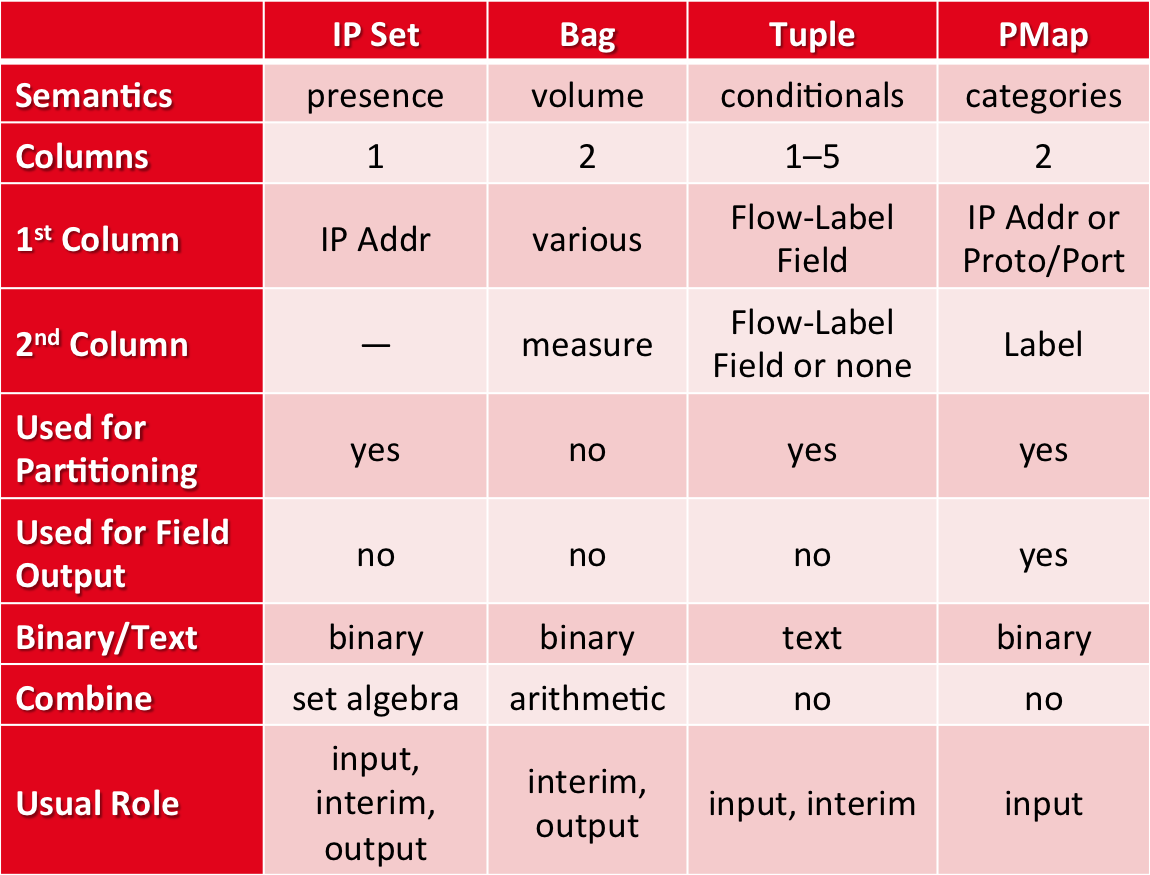

# Additional Information

This completes the Introduction to SiLK analysis notebook.  If you are interested in learning more, other learning resources are:
* [Using SiLK for Network Traffic Analysis: Analyst’s Handbook for SiLK Versions 3.8.3 and Later](http://tools.netsa.cert.org/silk/analysis-handbook.pdf)
    * The Analyst’s Handbook is useful for beginning, intermediate and advanced analysts using the SiLK tool suite for network flow analysis. It includes reviews of networking and Unix commands relevant for anyone using SiLK for network analysis. It provides readable descriptions of the SiLK tools and how they are used. The numerous examples will often form the basis of an analytic script you need. Once you know where “the good stuff” is located, you will refer to it often.
* [Network Profiling Using Flow](https://resources.sei.cmu.edu/library/asset-view.cfm?assetid=28115)
    * A step-by-step guide for profiling and discovering public-facing assets on a network using netflow data.
* [SiLK Tool Suite Quick Reference](http://tools.netsa.cert.org/silk/SiLK-QuickRef-2016-06.pdf)
    * A quick reference guide to the core analysis tools. Useful to print out and keep around.
* [SiLK Tooltips Wiki](https://tools.netsa.cert.org/confluence/display/tt/Tooltips)
    * Tips and tricks to use with the SiLK analysis suite. These documents point out features and uses of the tools that very helpful and not immediately obvious.
* [SiLK Reference Data](http://tools.netsa.cert.org/silk/referencedata.html)
    * 2 Sets of publically available SiLK Reference Data
* The [SEI YouTube Channel](https://www.youtube.com/playlist?list=PLSNlEg26NNpyBCKGeWaYWyuZPGfkaPWAM) has several SiLK related videos available.
